<a href="https://colab.research.google.com/github/SpaceTimeNarratives/demo/blob/main/spatial_narrative_demo0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spatial Narratives - Demo**
---



## Setting up...

In [1]:
!git clone https://github.com/SpaceTimeNarratives/demo.git

Cloning into 'demo'...
remote: Enumerating objects: 306, done.
remote: Counting objects: 100% (306/306), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 306 (delta 132), reused 201 (delta 62), pack-reused 0
Receiving objects: 100% (306/306), 29.17 MiB | 25.75 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [2]:
cd demo

/content/demo


In [3]:
!pip uninstall -y spacy

Found existing installation: spacy 3.4.4
Uninstalling spacy-3.4.4:
  Successfully uninstalled spacy-3.4.4


In [4]:
!pip -q install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.6/917.6 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 KB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 668.8/668.8 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 11.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.3.1 which is incompatible.


In [5]:
pip install lemminflect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
%run functions.py

<Figure size 432x288 with 0 Axes>

## Importing `spaCy`
We need to import the `spaCy` NLP pipeline and load the small version of the English model `en_core_web_sm` for tokenization, tagging, parsing and named entity recognition.

In [7]:
import spacy
from lxml import etree
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# for plotting the map
from geopy.geocoders import Nominatim
import folium

# Get coordinates for locations using GeoPy
geolocator = Nominatim(user_agent="my-application")

Load the Spacy model

In [8]:
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.9/dist-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## Extracting and Analysing Placenames

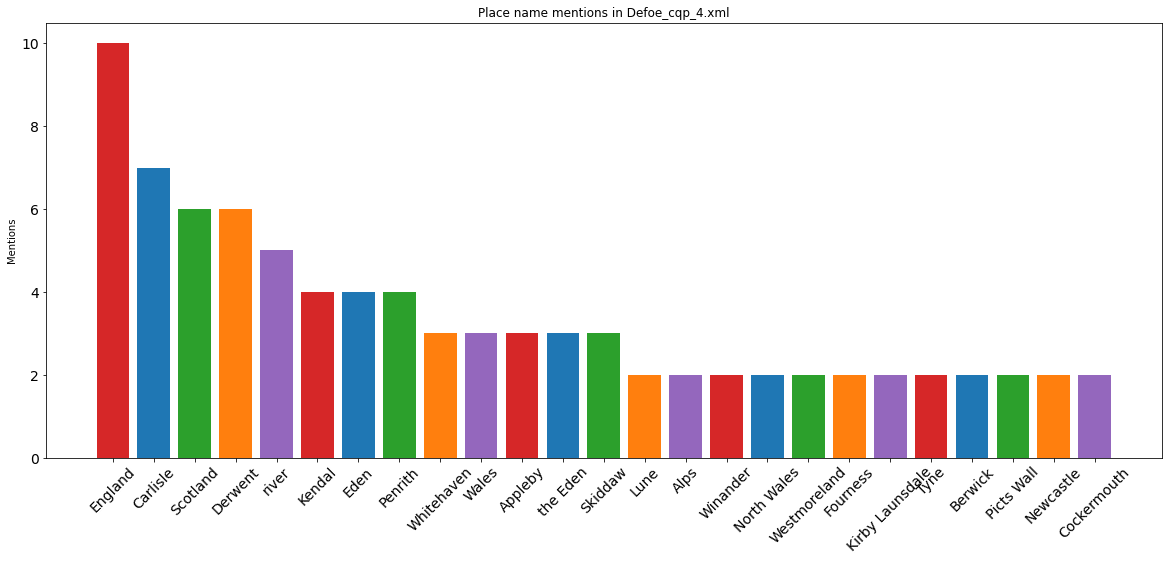

In [9]:
#@title ### Select file {run: "auto"}


#@markdown You can select a file from `gold_standard` folder.
Filename = "Defoe_cqp_4.xml" #@param ["Anon_cqp_66.xml", "Brown_cqp_10.xml", "Clarke_cqp_63.xml", "Cockin_cqp_19.xml", "Coleridge_cqp_33.xml", "Defoe_cqp_4.xml", "Garnett_cqp_62.xml", "Gray_cqp_13.xml", "Keats_cqp_44.xml", "Lt.Hammond._cqp_2.xml", "Otley__cqp_49.xml", "Pennant_cqp_12.xml", "Pennant_cqp_15.xml", "Phillips_cqp_38.xml", "Rix_cqp_78.xml", "Ruskin_cqp_55.xml", "Rutland_cqp_42.xml", "Shaw_cqp_24.xml", "Smith_cqp_5.xml", "Smith_cqp_6.xml", "Smith_cqp_7.xml", "Sullivan_cqp_20.xml", "Wakefield_cqp_37.xml", "Wesley_cqp_9.xml", "West_cqp_17.xml", "Wordsworth_cqp_47.xml", "Wordsworth_cqp_58.xml", "Young_cqp_11.xml"]

# spacy_processed = nlp(re.sub('<[^<]+>', "", open(f'gold_standard/{Filename}').read()))
spacy_processed = nlp(str(etree.tostring(etree.parse(f'gold_standard/{Filename}'
                  ), encoding='utf8', method='text')))
ld_place_names = [name.strip() for name in open('LD_placenames.txt').readlines()]
spacy_entities = extract_entities(spacy_processed.text, ld_place_names)

names, counts = zip(*Counter(plname for _,(plname,_) in spacy_entities.items()).most_common(25))

plt.figure(figsize=(20,8))

bar_labels = ['red', 'blue', 'green', 'orange', 'purple']*5
bar_colors = [f'tab:{col}' for col in bar_labels]
plt.bar(names, counts, label=bar_labels, color=bar_colors)
plt.ylabel('Mentions')
plt.title(f'Place name mentions in {Filename}')
plt.xticks(names, names, rotation=45)
plt.tick_params(axis='both', labelsize=14)
plt.show()

### Visualizing the place names in text

In [15]:
visualize(spacy_processed.text, spacy_entities)